In [485]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Label encoding for string columns
label_encoders = {}
for column in ['confID', 'playerID', 'tmID']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

unique_years = data['year'].unique()
rolling_window_results = []

for i in range(len(unique_years)-1):
    train_years = unique_years[:i+1]
    test_year = unique_years[i+1]

    X_train = data[data['year'].isin(train_years)].drop(['playoff'], axis=1)
    y_train = data[data['year'].isin(train_years)]['playoff']
    X_test = data[data['year'] == test_year].drop(['playoff'], axis=1)
    y_test = data[data['year'] == test_year]['playoff']
    
    # Train and evaluate the model
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    # Append the evaluation results
    rolling_window_results.append({
        'train_years': train_years,
        'test_year': test_year,
        'accuracy': accuracy
    })


In [486]:
data = pd.read_csv('new_data/clean-data_without_outliers.csv')
data.columns

Index(['playerID', 'year', 'stint', 'tmID', 'GP', 'oRebounds', 'dRebounds',
       'dq', 'PostMinutes', 'PostPoints', 'PostoRebounds', 'PostdRebounds',
       'PostRebounds', 'PostAssists', 'PostSteals', 'PostBlocks',
       'PostTurnovers', 'PostPF', 'PostDQ', 'career_year', 'ft%', 'fg%',
       'three%', 'gs%', 'Postft%', 'Postfg%', 'Postthree%', 'Postgs%', 'efg%',
       'ts%', 'ppg', 'rpg', 'apg', 'spg', 'bpg', 'eff', 'pp36',
       'defensive_prowess', 'defensive_discipline', 'mpg', 'pos', 'college',
       'playoff', 'confID', 'playoff_progression', 'height', 'weight',
       'award_count'],
      dtype='object')

In [487]:
# input_cols = ['GP','oRebounds','dRebounds','dq','PostMinutes','PostPoints',
#                 'PostoRebounds','PostdRebounds','PostRebounds','PostAssists',
#                 'PostSteals','PostBlocks','PostTurnovers','PostPF','PostDQ',
#                 'career_year','ft%','fg%','three%','gs%','Postft%','Postfg%',
#                 'Postthree%','Postgs%','efg%','ts%','ppg','rpg','apg','spg',
#                 'bpg','eff','pp36','defensive_prowess','defensive_discipline',
#                 'mpg','award_count','playoff_progression', 'playoff']
#less input cols
input_cols = ['ft%','fg%','three%','gs%',
              #'Postft%','Postfg%','Postthree%','Postgs%', #postseason
              #'efg%','ts%',
              'ppg','rpg','apg','spg','bpg','eff', 'pp36',
              'defensive_prowess','defensive_discipline',
              'mpg','award_count', 'playoff']

#'ft%', 'efg%', 'ts%', 'eff', 'defensive_prowess', 'defensive_discipline', 'mpg'

In [488]:
data = data[input_cols]

In [489]:
with_nulls = []
for i in data.isna().any().items():
    print(i)
    if i[1]:
        with_nulls.append(i[0])
        print(i[0])

('ft%', False)
('fg%', False)
('three%', False)
('gs%', False)
('ppg', False)
('rpg', False)
('apg', False)
('spg', False)
('bpg', False)
('eff', False)
('pp36', False)
('defensive_prowess', False)
('defensive_discipline', False)
('mpg', False)
('award_count', False)
('playoff', False)


In [490]:
def corr_plot(corr):

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

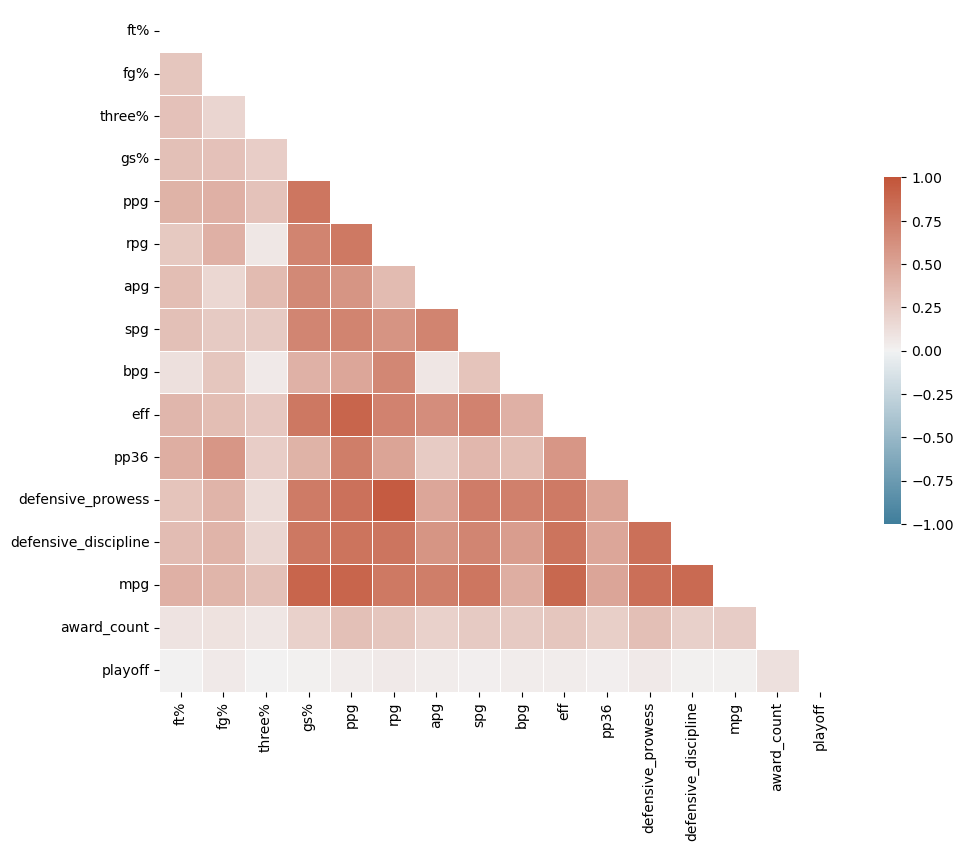

In [491]:
cor_matrix = data[input_cols].corr().abs()
corr_plot(cor_matrix)

In [492]:
val = cor_matrix['playoff'].sort_values(ascending=True)
sorted_columns = val.index.values
sorted_columns

array(['ft%', 'three%', 'defensive_discipline', 'mpg', 'gs%', 'spg',
       'pp36', 'eff', 'bpg', 'ppg', 'apg', 'fg%', 'defensive_prowess',
       'rpg', 'award_count', 'playoff'], dtype=object)

In [493]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
upper_tri

,ft%,fg%,three%,gs%,ppg,rpg,apg,spg,bpg,eff,pp36,defensive_prowess,defensive_discipline,mpg,award_count,playoff
ft%,NaN,0.277625,0.306969,0.316658,0.404850,0.259905,0.335057,0.313886,0.112823,0.375088,0.432752,0.295725,0.337890,0.420118,0.086544,0.002978
fg%,NaN,NaN,0.183532,0.311636,0.421689,0.421059,0.170634,0.256062,0.275319,0.335158,0.579266,0.391855,0.393738,0.390334,0.099209,0.050502
three%,NaN,NaN,NaN,0.234359,0.298812,0.066363,0.344524,0.250016,0.046979,0.268260,0.234179,0.134834,0.174689,0.318097,0.076869,0.007736
gs%,NaN,NaN,NaN,NaN,0.783471,0.700906,0.665006,0.689994,0.408168,0.777488,0.399196,0.755793,0.779315,0.891073,0.209781,0.014005
ppg,NaN,NaN,NaN,NaN,NaN,0.766660,0.588800,0.696005,0.479108,0.896600,0.736389,0.812752,0.797542,0.890980,0.315203,0.034368
rpg,NaN,NaN,NaN,NaN,NaN,NaN,0.348609,0.596118,0.678047,0.706124,0.496762,0.953794,0.790149,0.767061,0.278818,0.054462
apg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.697597,0.070758,0.637626,0.243251,0.483773,0.589723,0.737723,0.207229,0.036090
spg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.289317,0.703568,0.373504,0.742697,0.692041,0.781509,0.252455,0.020403
bpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.419151,0.331116,0.725307,0.537387,0.436686,0.257523,0.032341
eff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.582921,0.763002,0.799462,0.880145,0.280942,0.032299


In [494]:
corr = data.corr().abs()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]

In [495]:
selected_columns = selected_columns[1:].values
selected_columns.shape

(11,)

In [496]:
selected_columns

array(['fg%', 'three%', 'gs%', 'ppg', 'rpg', 'apg', 'spg', 'bpg', 'pp36',
       'award_count', 'playoff'], dtype=object)

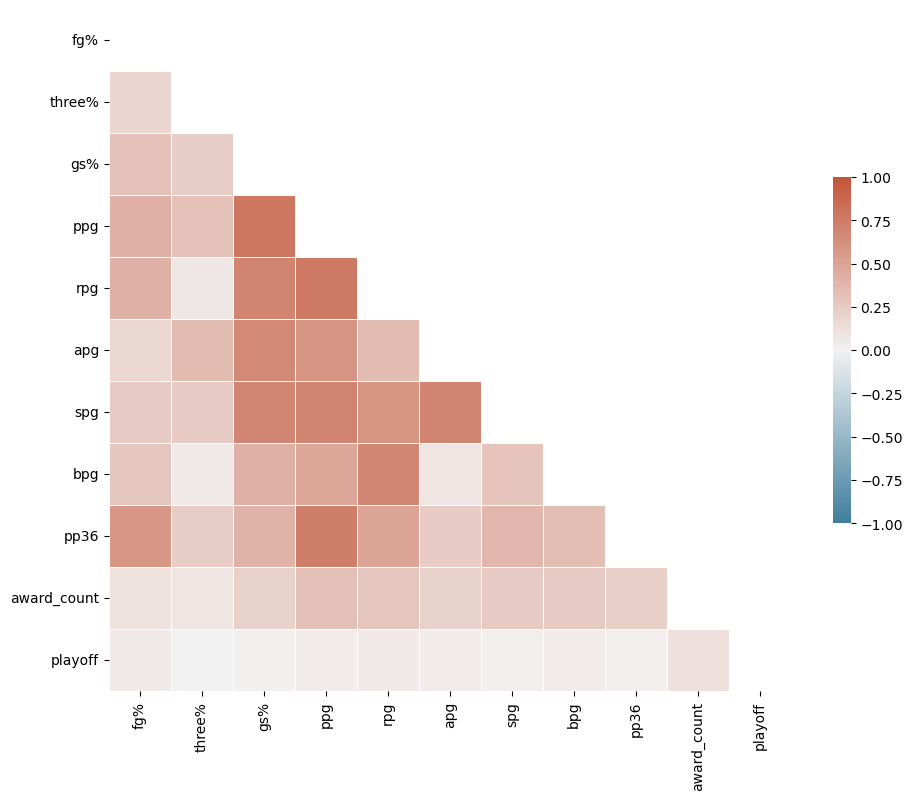

In [497]:
data = data[selected_columns]
corr_plot(data.corr().abs())

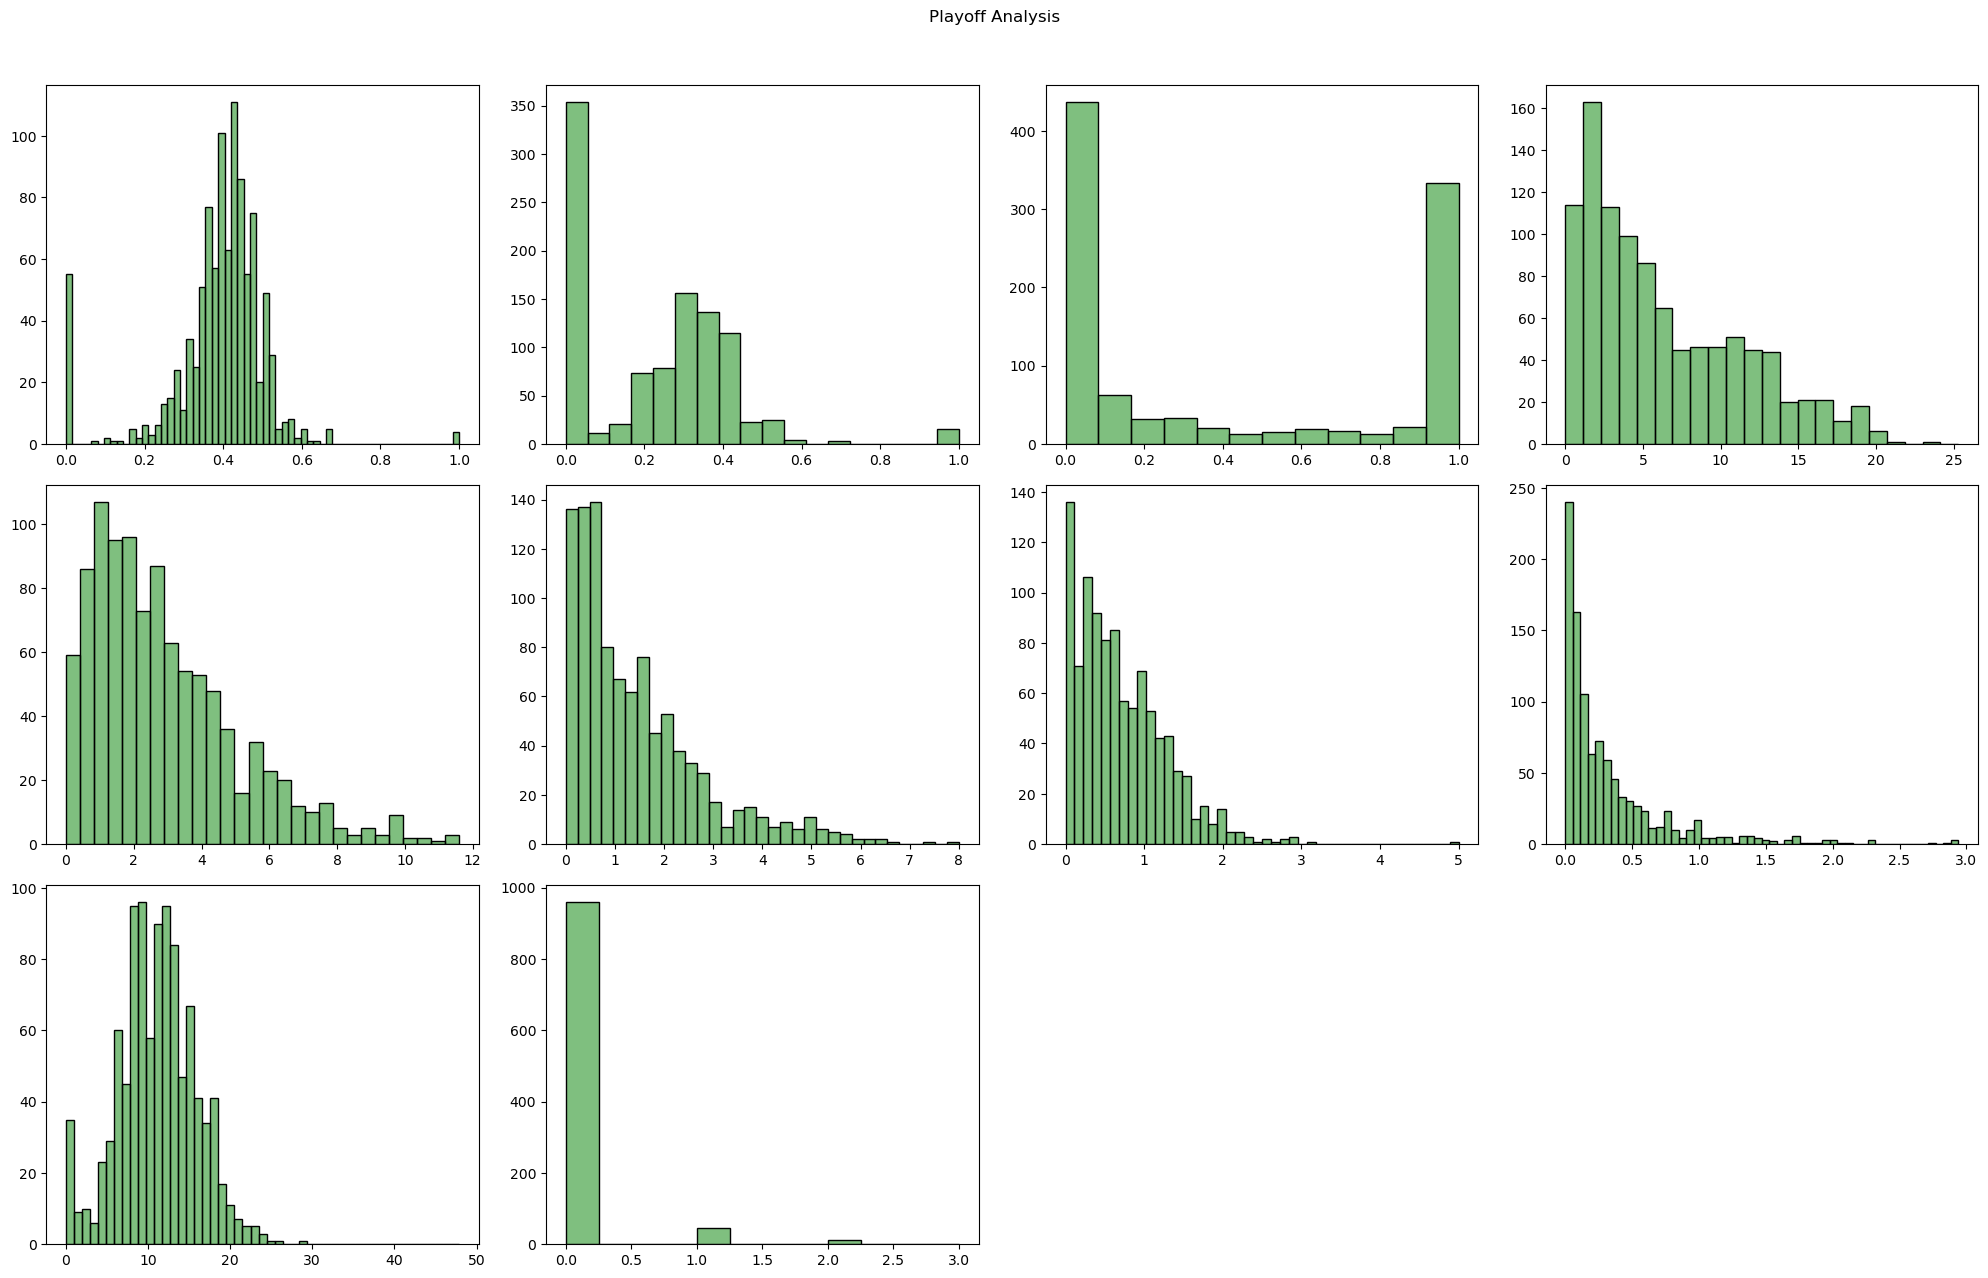

In [498]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
fig = plt.figure(figsize=(20, 25))
j = 0

# Iterate over each column, excluding 'playoff'
for i in data.columns:
    if i != 'playoff': 
        plt.subplot(6, 4, j+1)
        j += 1
        column_name = i

        # Plot histogram with hue for differentiation
        #check which columns have errors
        try:
            sns.histplot(data, x=i, hue='playoff', palette=['r', 'g'], kde=True)
            plt.legend(title=column_name, loc='best', labels=['Did not make playoffs', 'Made playoffs'])
            plt.xlabel(column_name)
            plt.ylabel('Count')
        except:
            pass

        # Set the title and adjust layout
fig.suptitle('Playoff Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

# Display the plot
plt.show()

In [499]:
Y = data["playoff"].values
X = data.drop(["playoff"], axis=1).values

In [500]:

    # INSERT YOUR MODEL TRAINING AND EVALUATION CODE HERE
    # Example:
    # model = DecisionTreeClassifier()
    # model.fit(X_train, y_train)
    # accuracy = model.score(X_test, y_test)
    # rolling_window_results.append(accuracy)


RFECV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
      estimator=DecisionTreeClassifier(max_depth=41, max_features='sqrt',
                                       min_samples_leaf=5,
                                       min_samples_split=6),
      scoring='roc_auc')

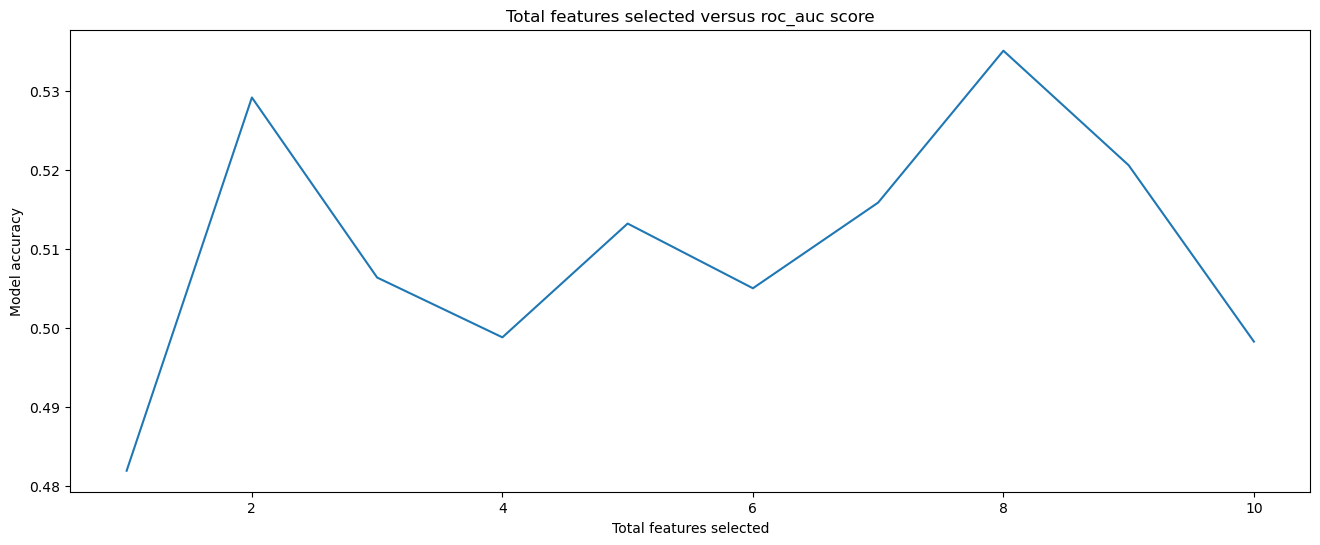

In [501]:

    # INSERT YOUR MODEL TRAINING AND EVALUATION CODE HERE
    # Example:
    # model = DecisionTreeClassifier()
    # model.fit(X_train, y_train)
    # accuracy = model.score(X_test, y_test)
    # rolling_window_results.append(accuracy)


In [502]:
df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])

for i in range(X.shape[1]):
    row = {'feature': i, 'support': selector.support_[i], 'ranking': selector.ranking_[i]}
    df_features = df_features._append(row, ignore_index=True)
    
df_features.sort_values(by='ranking').head(10)

,feature,support,ranking
0,0,True,1
2,2,True,1
3,3,True,1
4,4,True,1
5,5,True,1
6,6,True,1
7,7,True,1
8,8,True,1
1,1,False,2
9,9,False,3


In [503]:

    # INSERT YOUR MODEL TRAINING AND EVALUATION CODE HERE
    # Example:
    # model = DecisionTreeClassifier()
    # model.fit(X_train, y_train)
    # accuracy = model.score(X_test, y_test)
    # rolling_window_results.append(accuracy)


Accuracy: 0.5026881720430108


In [504]:

    # INSERT YOUR MODEL TRAINING AND EVALUATION CODE HERE
    # Example:
    # model = DecisionTreeClassifier()
    # model.fit(X_train, y_train)
    # accuracy = model.score(X_test, y_test)
    # rolling_window_results.append(accuracy)


array(['x0', 'x1', 'x2', 'x3', 'x5', 'x6', 'x7', 'x8', 'x9'], dtype=object)

In [505]:
selected_features = selector.get_support(1)
selected_features

array([0, 2, 3, 4, 5, 6, 7, 8])

In [506]:
new_inputs = data[data.columns[selected_features]]
new_inputs.columns

Index(['fg%', 'gs%', 'ppg', 'rpg', 'apg', 'spg', 'bpg', 'pp36'], dtype='object')